In [1]:
# import packages
from astropy.io import fits
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd

from lmfit import Model, fit_report
from lmfit.models import LinearModel

import os
notebook_path = os.path.abspath('h2_h3p_vel_compare.ipynb' + "/../")
imgpath = os.path.join(os.path.dirname(notebook_path), 'plots/vorf')

In [2]:
h2_vorf = fits.open('h2_vorf.fits', ignore_missing_end=True)[0].data
h3p_vorf = fits.open('h3p_vorf.fits', ignore_missing_end=True)[0].data
h2_verr = fits.open('h2_verr.fits', ignore_missing_end=True)[0].data
h3p_verr = fits.open('h3p_verr.fits', ignore_missing_end=True)[0].data
h2_int = fits.open('h2_int_shifted.fits', ignore_missing_end=True)[0].data
h3p_int = fits.open('h3p_int_shifted.fits', ignore_missing_end=True)[0].data
ref_sun = fits.open('ref_sun.fits', ignore_missing_end=True)[0].data

h2_vorf[h2_verr > 4] = np.nan
h3p_vorf[h3p_verr > 4] = np.nan

h2_vorf[h2_vorf > 8] = np.nan
h3p_vorf[h3p_vorf > 8] = np.nan
h2_vorf[h2_vorf < -8] = np.nan
h3p_vorf[h3p_vorf < -8] = np.nan

h2_vorf[:,:20] = np.nan
h3p_vorf[:,:20] = np.nan
h2_vorf[:,280:] = np.nan
h3p_vorf[:,280:] = np.nan

h2_verr[np.isnan(h2_vorf)] = np.nan
h3p_verr[np.isnan(h3p_vorf)] = np.nan
h2_int[np.isnan(h2_vorf)] = np.nan
h3p_int[np.isnan(h3p_vorf)] = np.nan

In [3]:
cmlsel = pd.read_csv('cml-sel.txt', sep='\s+', header=None)
cml = cmlsel[3].to_numpy()
sel = cmlsel[4].to_numpy()

vmp = 3.41*np.sin((185-cml)*(np.pi/180))*np.cos((sel)*(np.pi/180))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


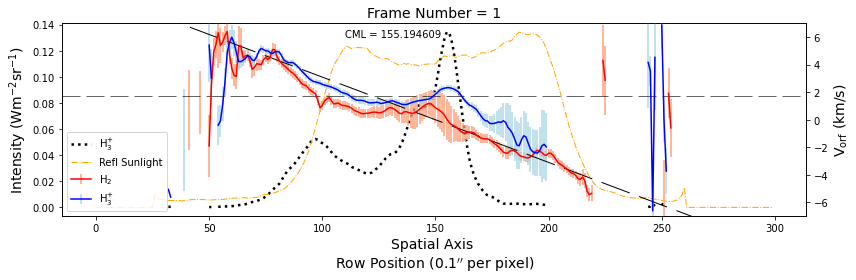

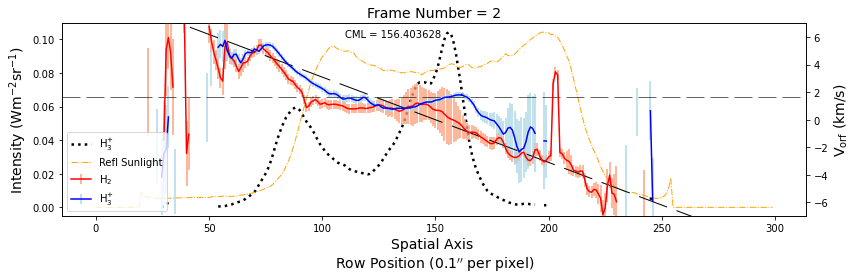

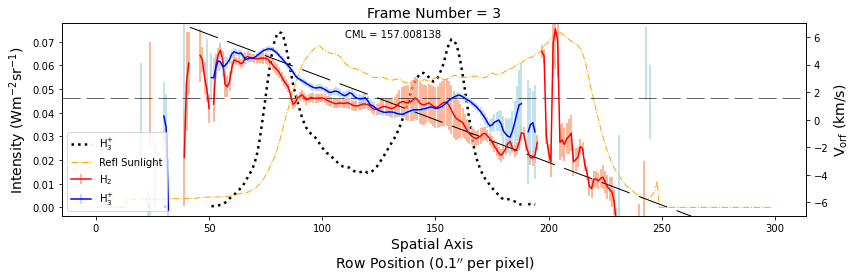

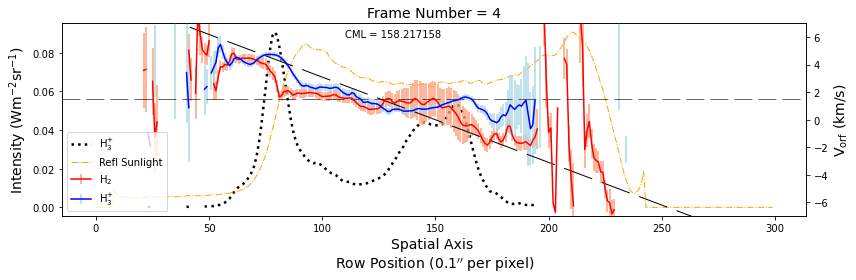

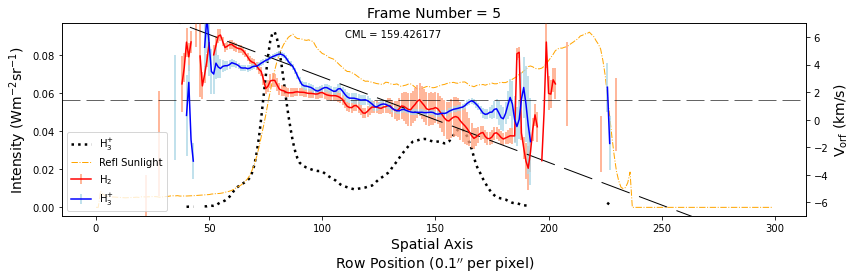

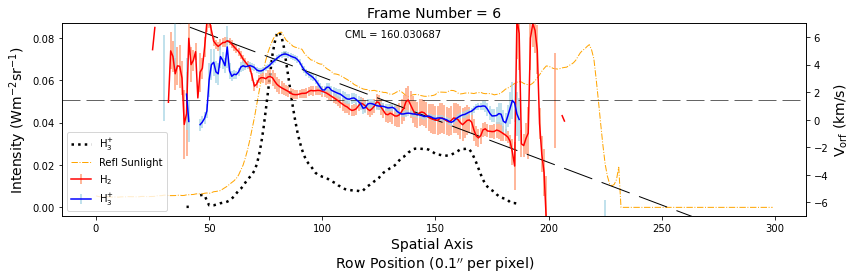

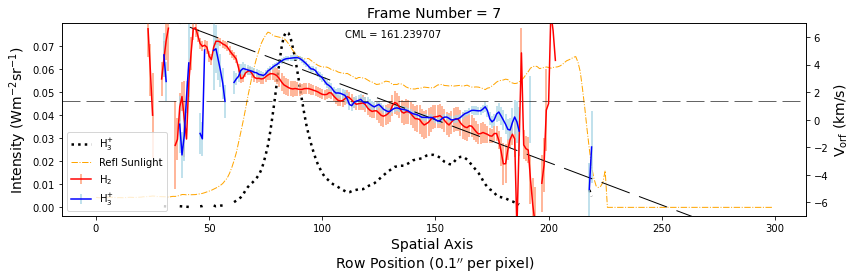

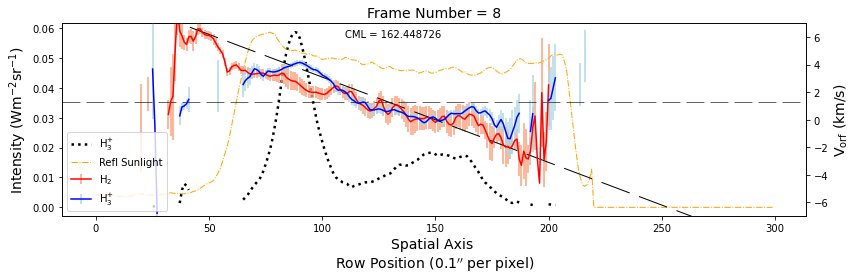

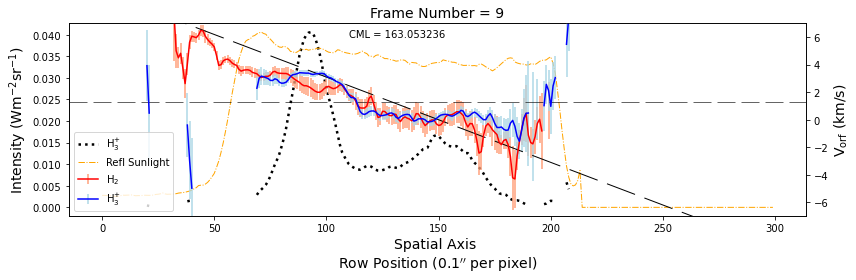

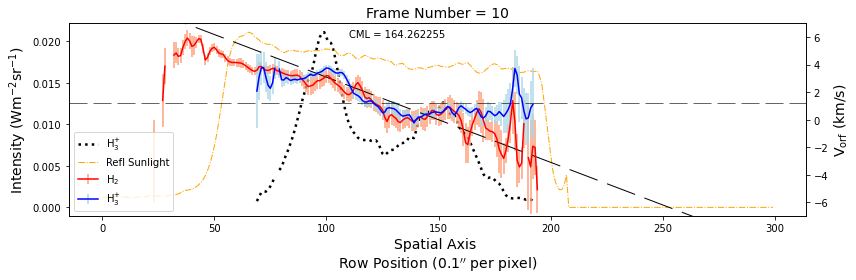

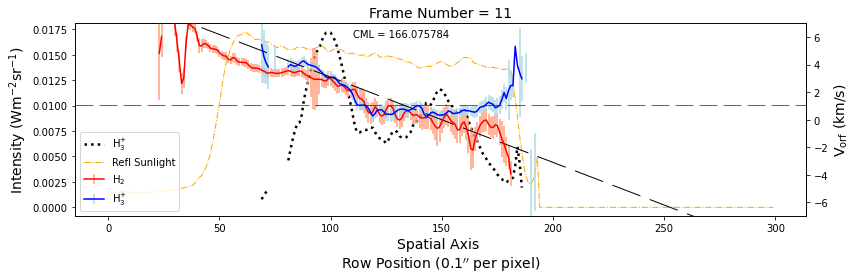

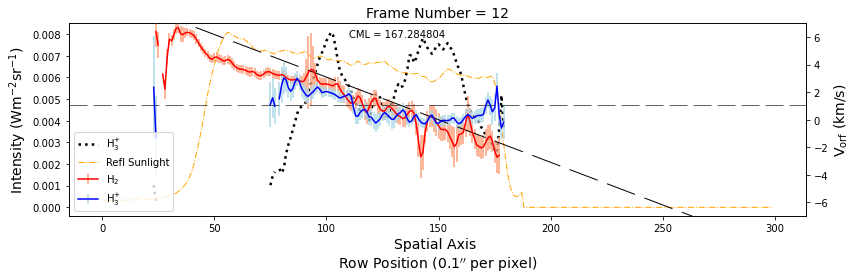

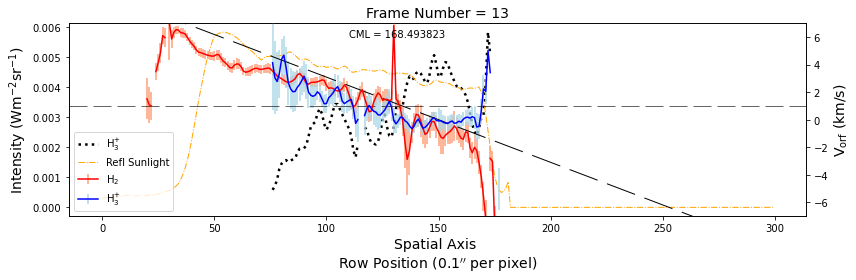

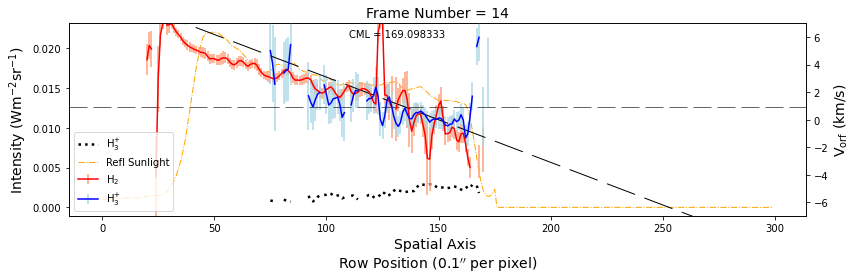

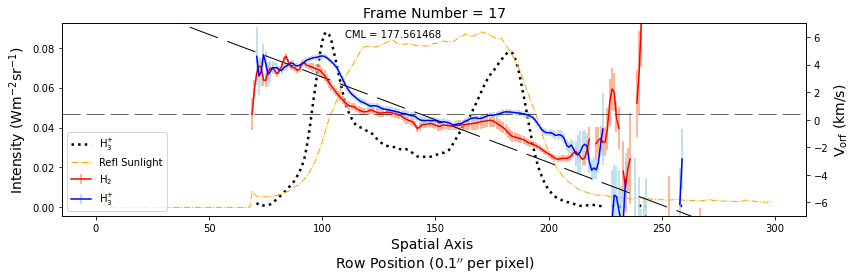

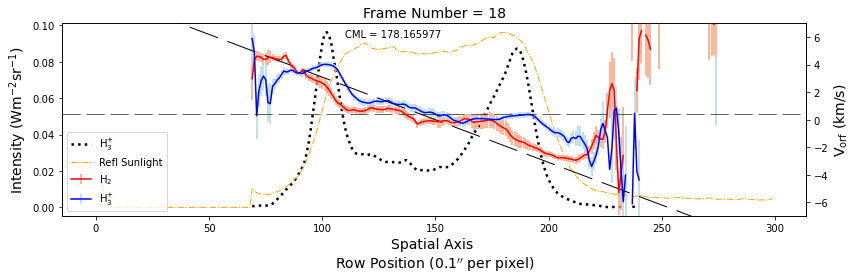

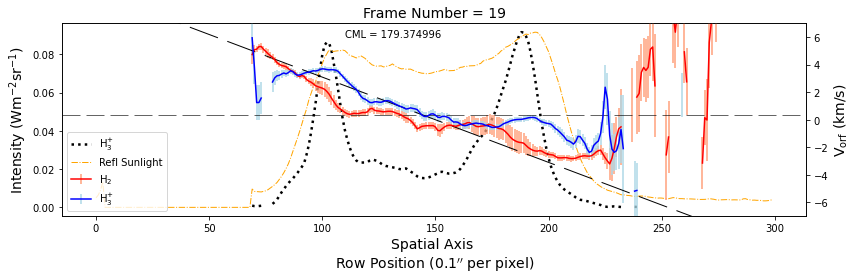

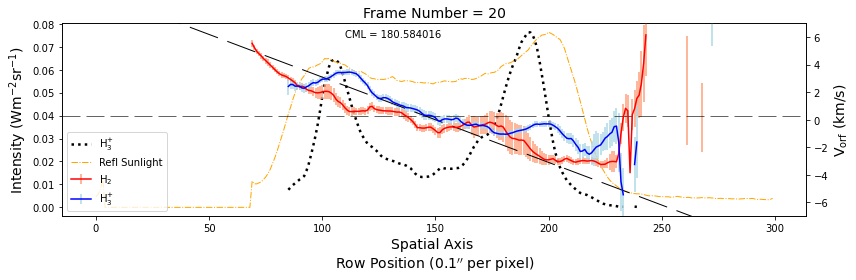

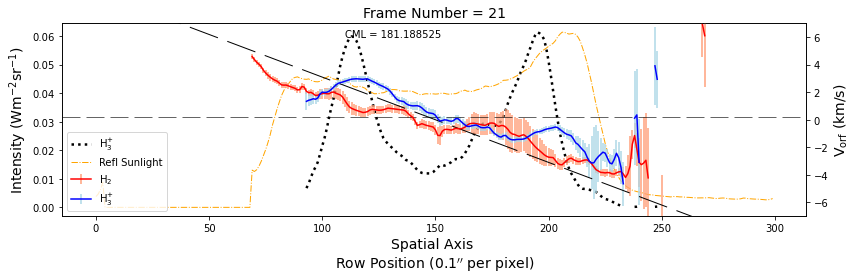

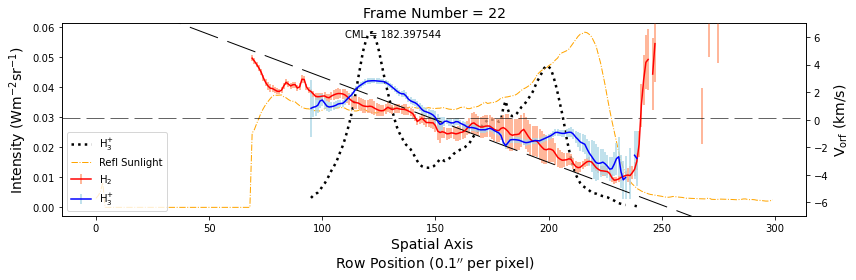

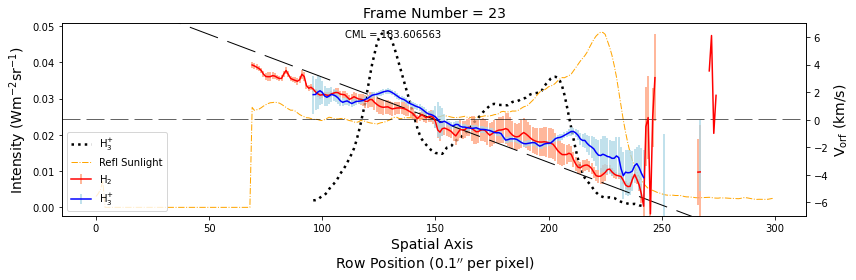

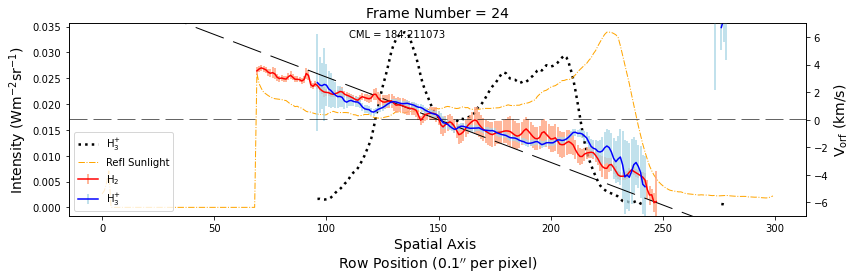

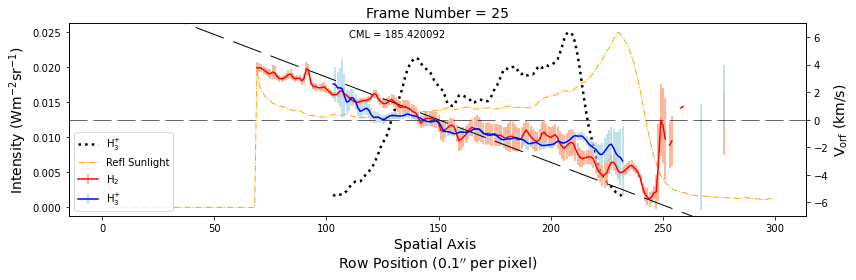

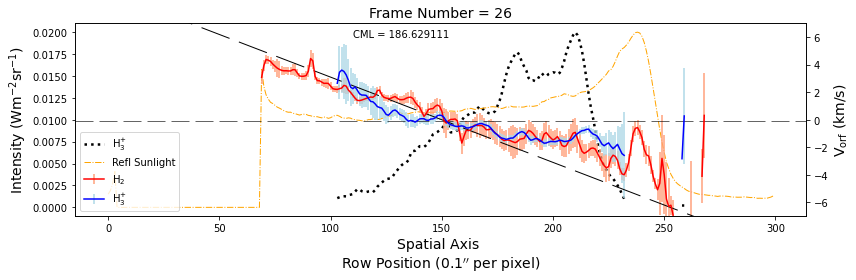

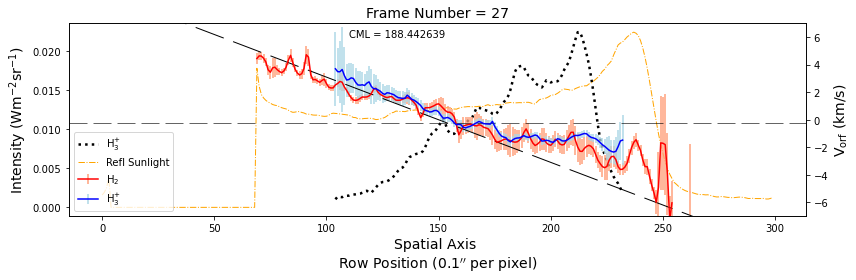

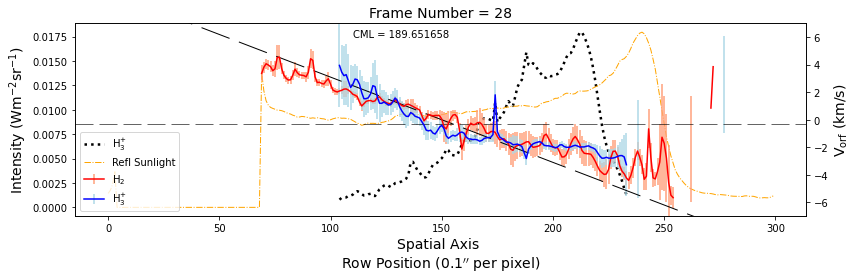

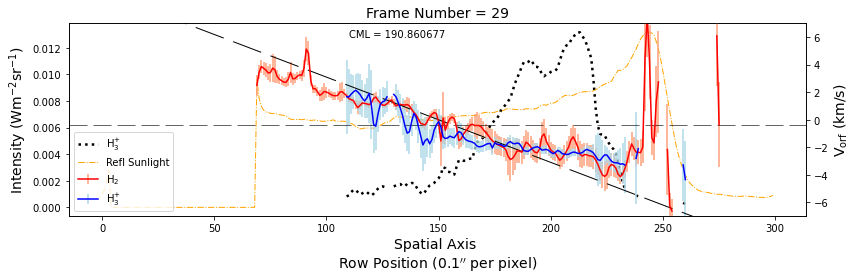

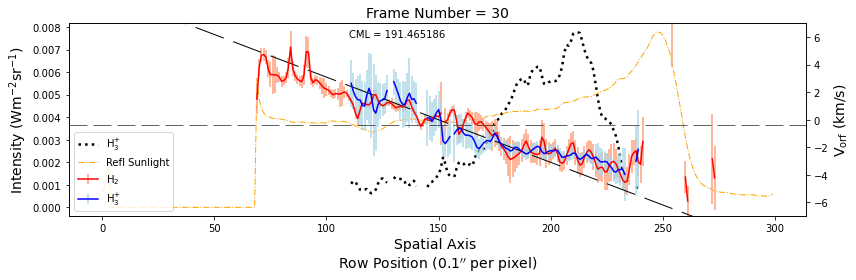

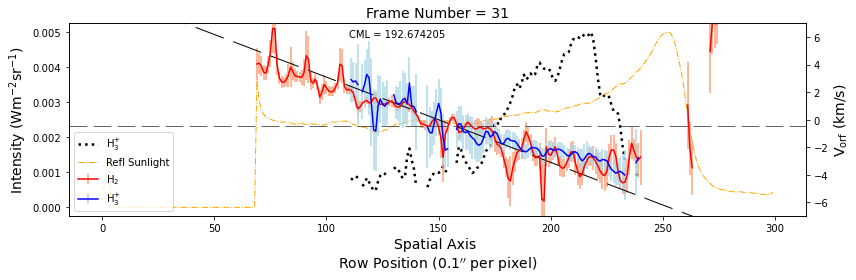

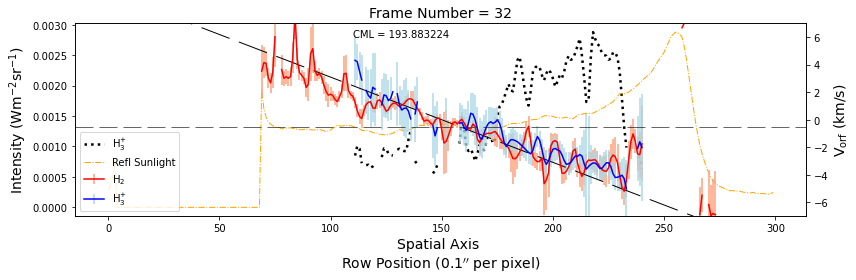

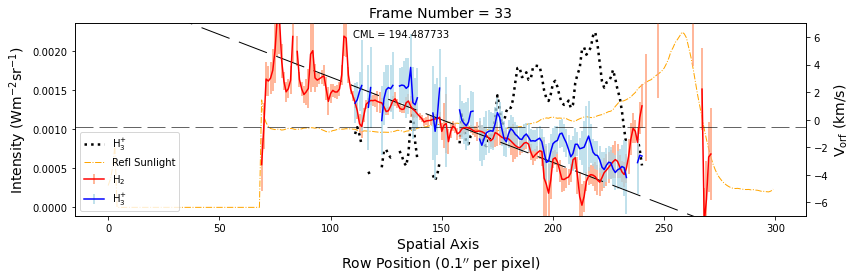

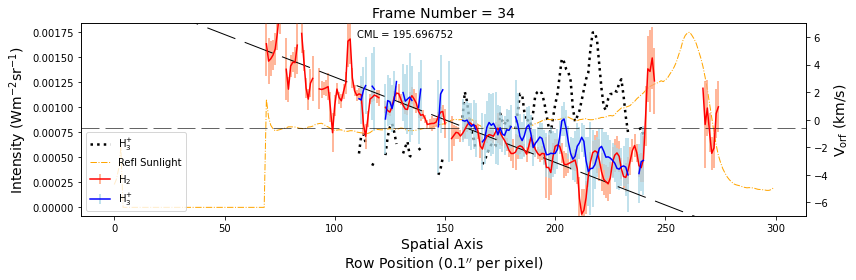

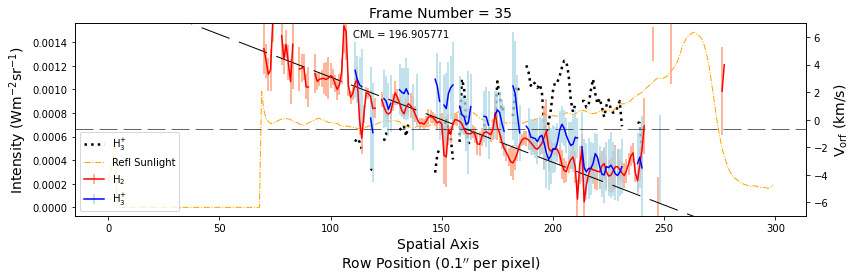

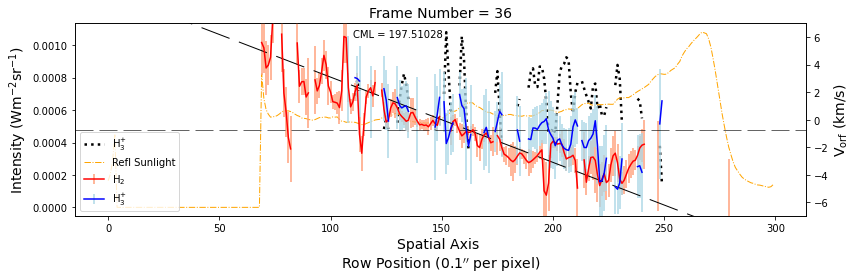

In [23]:
ang_diam = 40.58867
ang_diam/(0.1)
limb_vel = 12.572
vel_slope = limb_vel * 2 / (ang_diam/(0.1))

x = np.linspace(0,299,300)
rot_rate = vel_slope * x
rot_rate = rot_rate - rot_rate[150]

a2 = h2_vorf*(-1)
b2 = h3p_vorf*(-1)

c2 = b2 - a2

errc2 = np.sqrt((h3p_verr)**2 + (h2_verr)**2)

for i in range(len(h3p_vorf)):
# for i in range(17, 38):
    if i not in (0,15,16,37):  
        xnew = np.linspace(0,299,300)
#         int2 = (h3p_int/np.nanmax(h3p_int[i])*7.8-3.9)
        int2 = (ref_sun/np.nanmax(ref_sun[i])*np.nanmax(h3p_int[i]))
        
        fig, ax = plt.subplots(figsize = (12, 4))
        plt.title('Frame Number = '+str(i), fontsize=14)
        
        ax2 = ax.twinx()
        ax.plot(xnew, h3p_int[i], color='k', ls=':', label='H$_3^{+}$', lw=2.5)
        ax.plot(xnew, int2[i], color='orange', ls='-.', label='Refl Sunlight', lw=1)
        ax2.errorbar(xnew, a2[i], yerr=h2_verr[i], color='red', ecolor='lightsalmon', label='H$_2$')
        ax2.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='blue', ecolor='lightblue', label='H$_3^{+}$')
        ax2.plot(-rot_rate, color='black', ls='dashed', dashes=(30, 10), lw=1)
#         ax2.errorbar(xnew, c2[i], yerr=errc2[i], color='green', ecolor='lightgreen', label='H$_3^{+}$-H$_2$')
        
        # giving labels to the axises
        ax.set_xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
        ax.set_ylabel('Intensity (Wm$^{-2}$sr$^{-1}$)', fontsize=14)

        # secondary y-axis label
        ax2.set_ylabel('V$_{\mathrm{orf}}$ (km/s)', fontsize=14)
        
#         plt.figure(figsize=(12,4))
#         plt.plot(a2[num], label='H2')
#         plt.plot(b2[num], label='H3+')
#         plt.plot(xnew, int2[i], color='teal', ls='-', label='H$_3^{+}$ - Int')
#         plt.errorbar(xnew, a2[i], yerr=h2_verr[i], color='red', ecolor='gray', label='H$_2$')
#         plt.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='blue', ecolor='lightblue', label='H$_3^{+}$')
        plt.text(125, 6, 'CML = '+str(cml[i]))
        plt.axhline(y=vmp[i], xmin=0, xmax=1, color='black', ls='dashed', dashes=(30, 10), lw=0.6)
#         plt.xlim(0,250)
        plt.ylim(-7,7)
#         plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
#         plt.ylabel('V$_{\mathrm{orf}}$ (km/s)', fontsize=14)
        
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc=3)
        
        plt.tight_layout()
#         plt.savefig(imgpath + '/h2_h3p_int_vel_fr' +str(i), dpi=400, bbox_inches='tight', facecolor='white')

In [22]:
np.linspace(-150,150,301)[150]

0.0

In [12]:
10000/2.2006

4544.215214032536

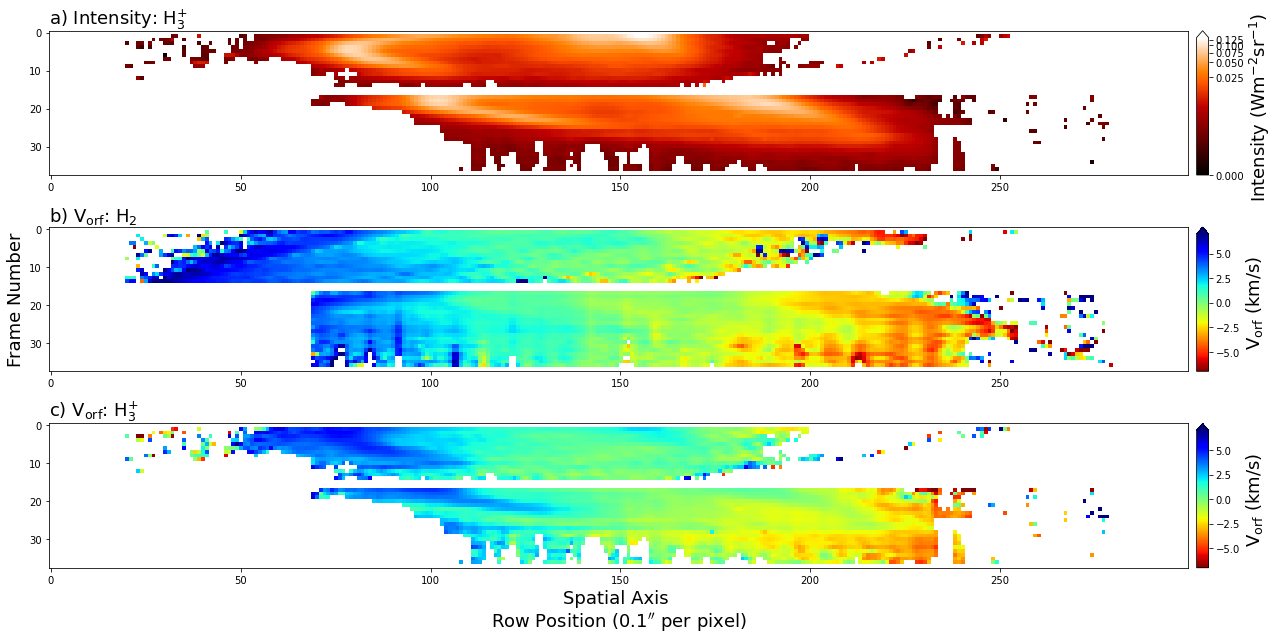

In [6]:
fig = plt.figure(figsize=(24,9), tight_layout=True)

fig.add_subplot(311)
plt.imshow(h3p_int, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
# plt.ylabel('Frame Number', fontsize=18)
plt.title('a) Intensity: H$_3^{+}$', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.005).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

fig.add_subplot(312)
plt.imshow(a2, cmap='jet_r', vmin=-7, vmax=7)
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('b) V$_{\mathrm{orf}}$: H$_2$', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.005).set_label(label='V$_{\mathrm{orf}}$ (km/s)',size=18)

fig.add_subplot(313)
plt.imshow(b2, cmap='jet_r', vmin=-7, vmax=7)
plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
# plt.ylabel('Frame Number', fontsize=24)
plt.title('c) V$_{\mathrm{orf}}$: H$_3^{+}$', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.005).set_label(label='V$_{\mathrm{orf}}$ (km/s)',size=18)

# fig.add_subplot(514)
# plt.imshow(c3, cmap='jet_r', vmin=-1.5, vmax=3.5)
# # plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
# # plt.ylabel('Frame Number', fontsize=18, alpha=0)
# plt.title('d) V$_{\mathrm{orf}}$: H$_3^{+}$ - H$_2$', loc='left', fontsize=18)
# plt.colorbar(extend='max', aspect=12, pad=0.005).set_label(label='V$_{\mathrm{orf}}$ (km/s)',size=18)

# fig.add_subplot(515)
# plt.imshow(e3, cmap='jet_r', vmin=-2, vmax=2)
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=24)
# plt.ylabel('Frame Number', fontsize=10, alpha=0)
# plt.title('e) V$_{\mathrm{orf}}$: H$_3^{+}$ - H$_2$ ($\mathrm{min}$)', loc='left', fontsize=18)
# plt.colorbar(extend='max', aspect=12, pad=0.005).set_label(label='V$_{\mathrm{orf}}$ (km/s)',size=18)

# fig.supxlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
# fig.supylabel('Frame Number', fontsize=18)
plt.savefig(imgpath + '/h2_h3p_int_vel_curr_map', dpi=400, bbox_inches='tight', facecolor='white')

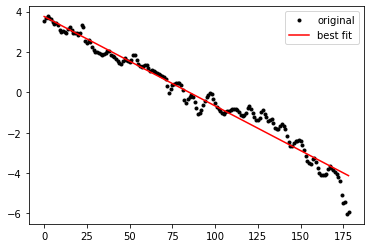

In [18]:
yy = a2[24][np.isfinite(a2[24])]
xx = range(len(yy))

mod = LinearModel()

pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)

sl = out.params['slope'].value
intc = out.params['intercept'].value

ny = sl*xx+intc

plt.plot(xx, yy, 'k.', label='original')
plt.plot(xx, ny, 'r', label='best fit')
plt.legend()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


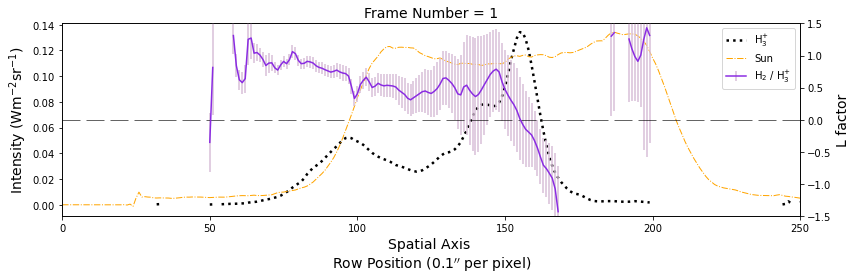

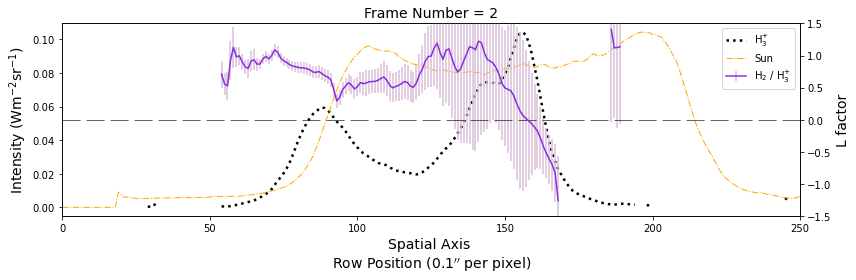

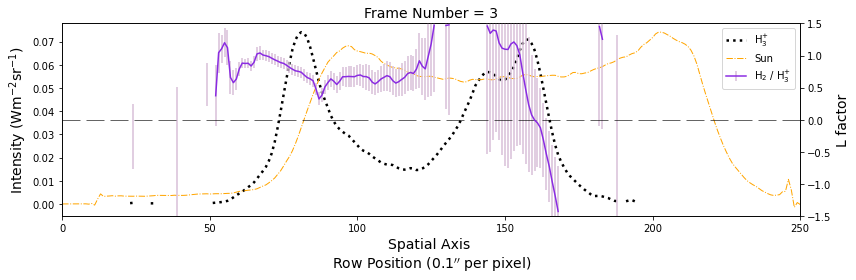

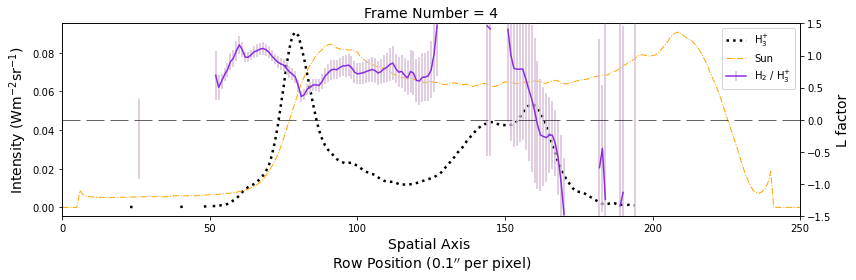

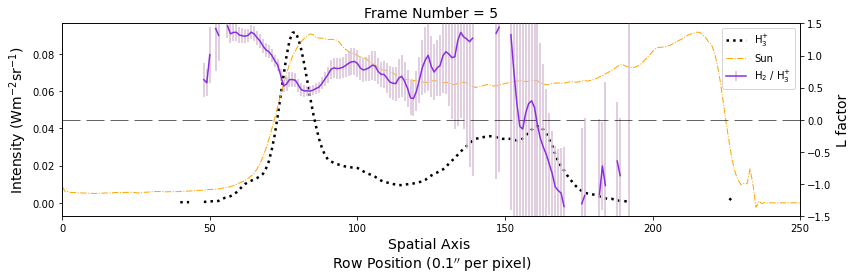

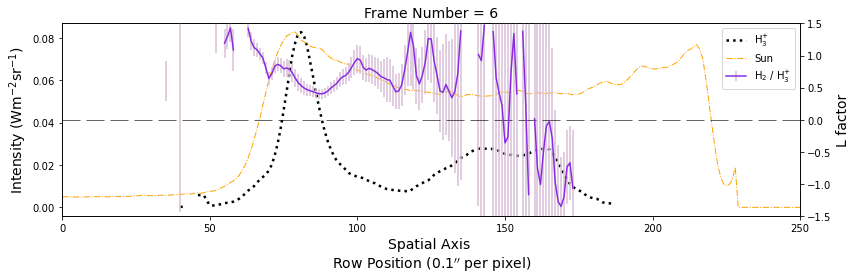

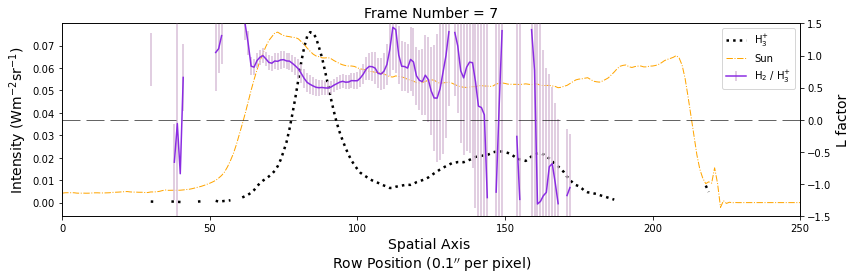

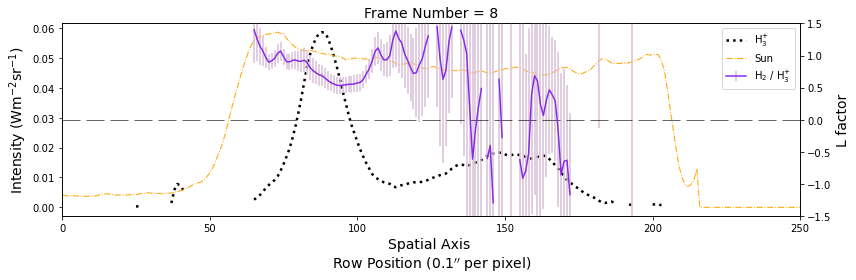

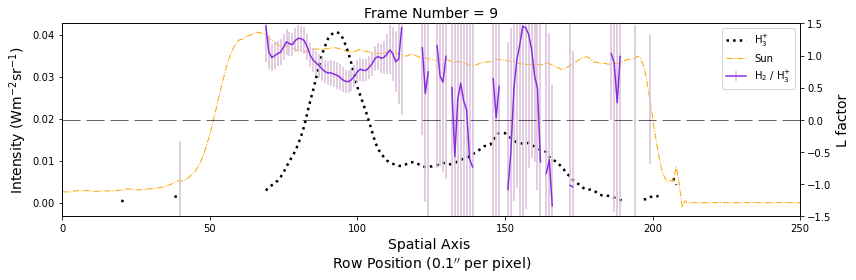

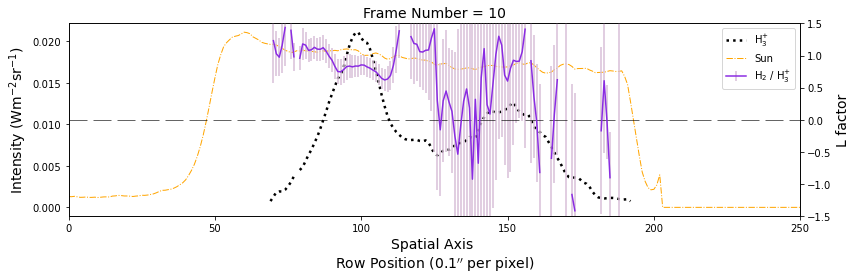

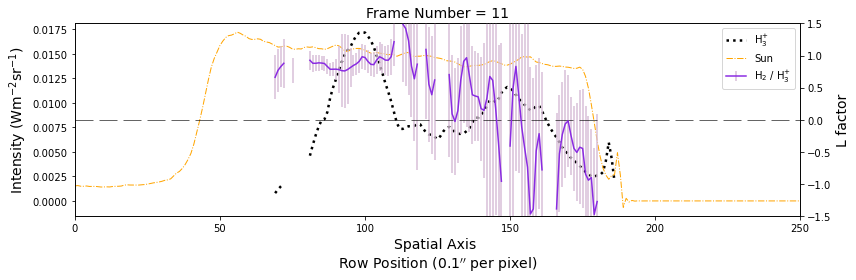

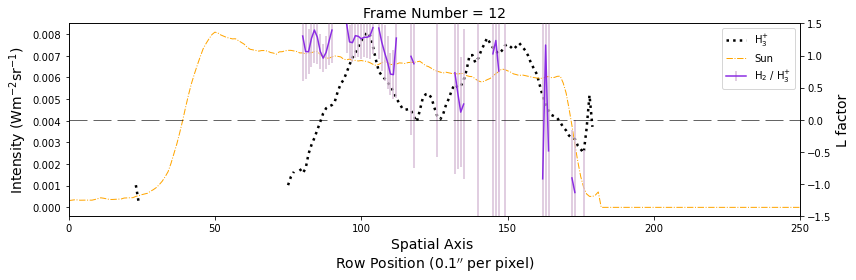

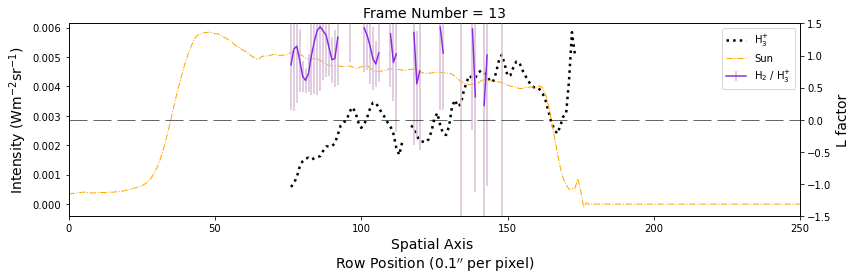

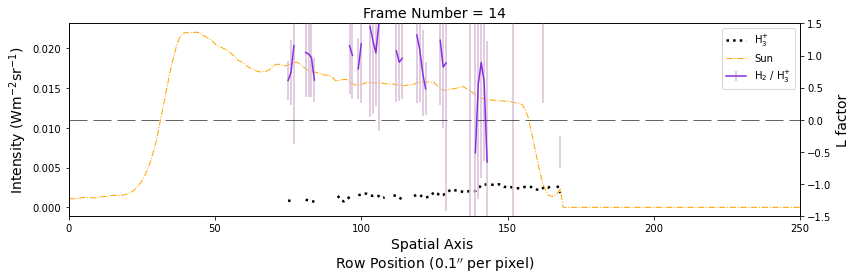

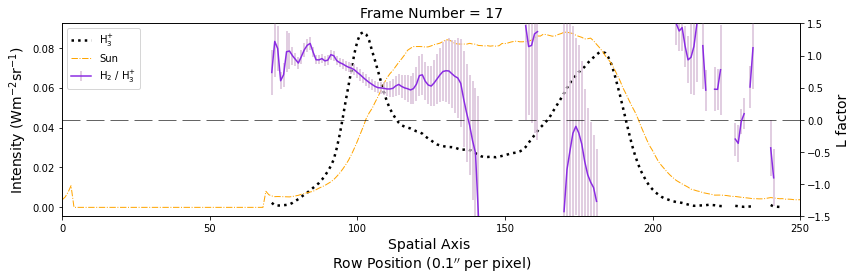

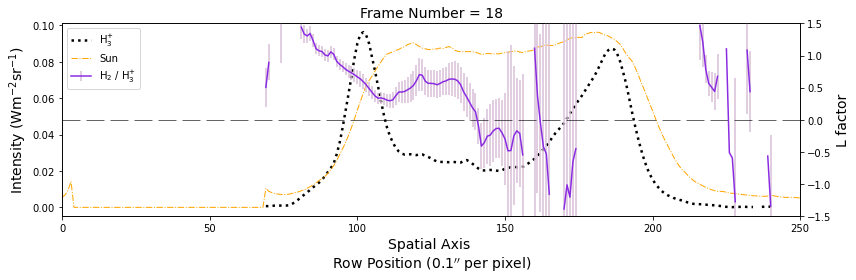

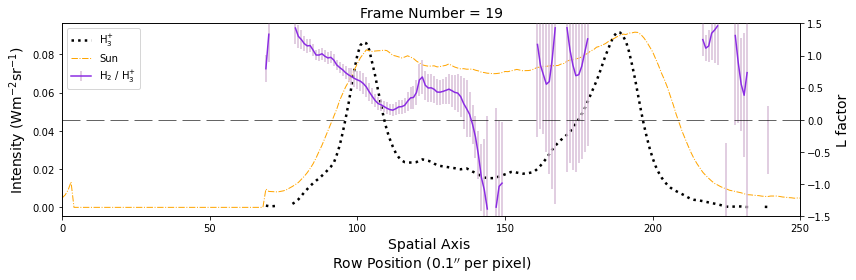

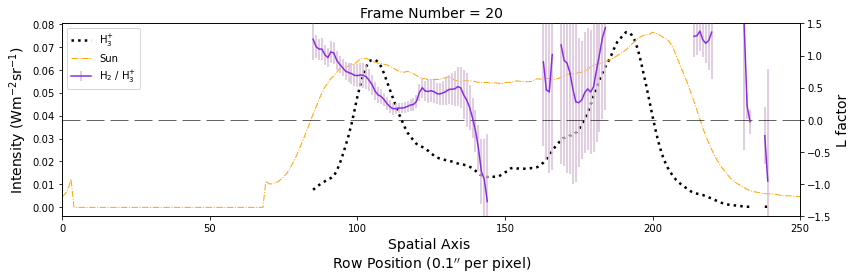

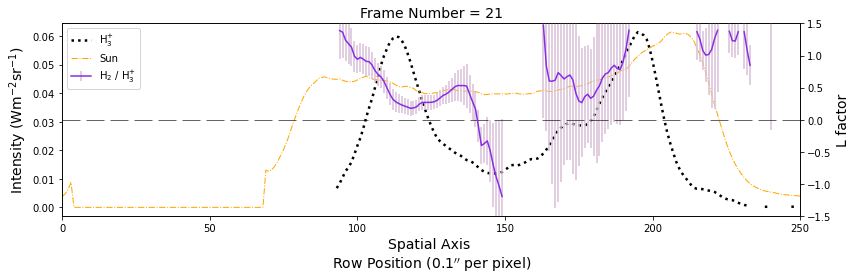

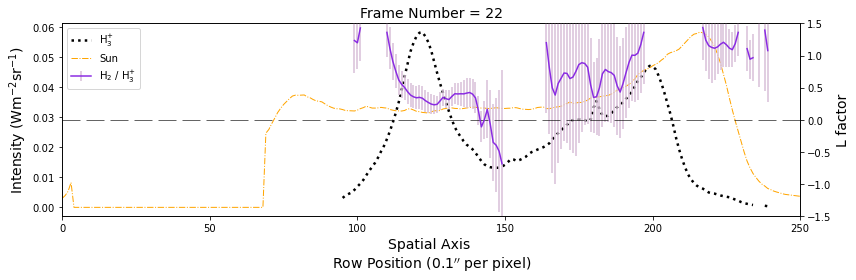

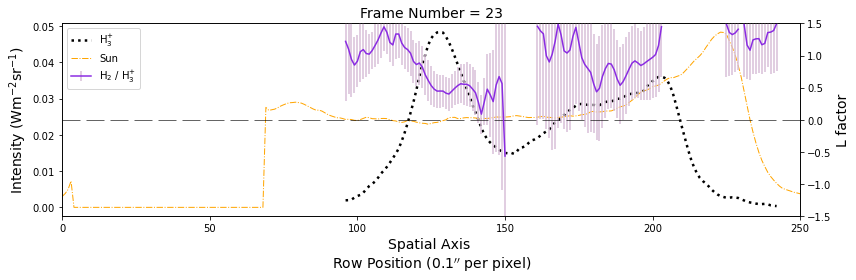

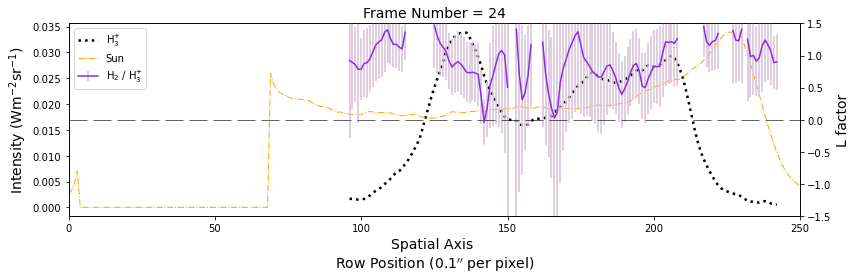

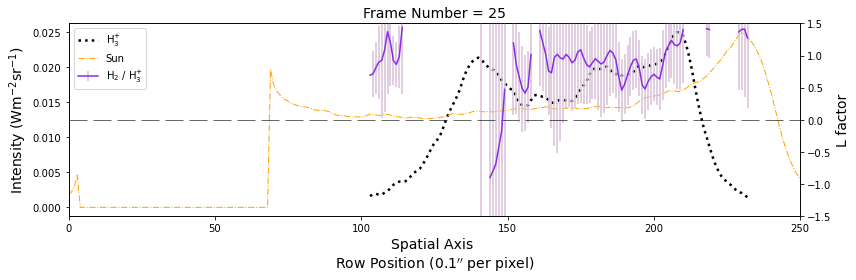

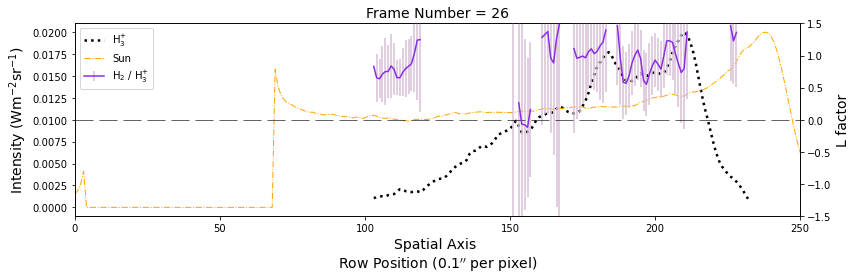

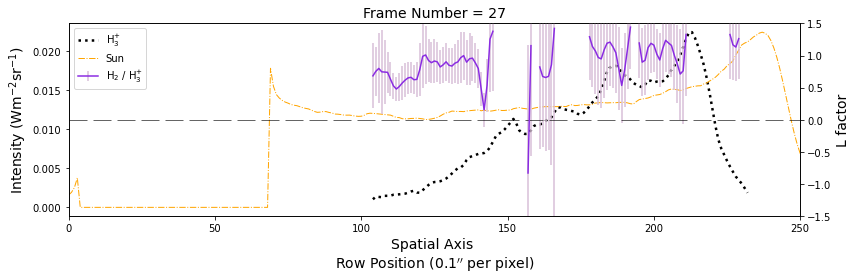

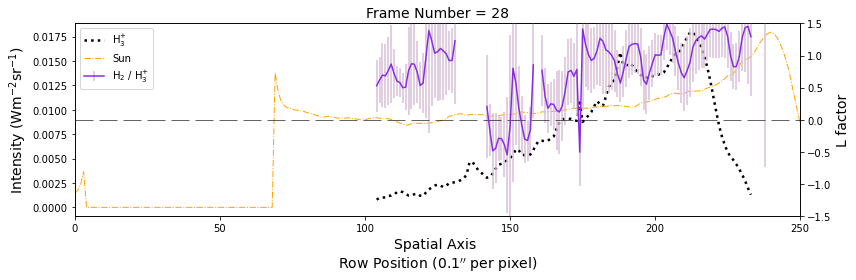

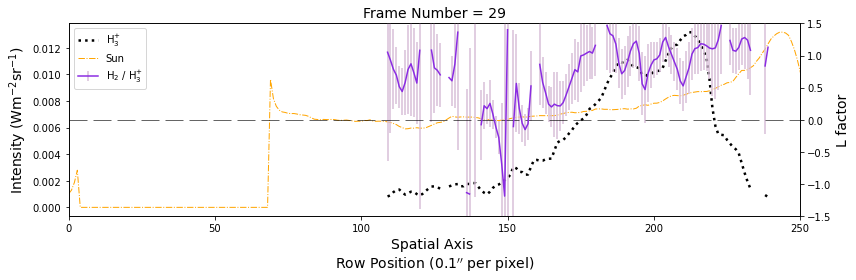

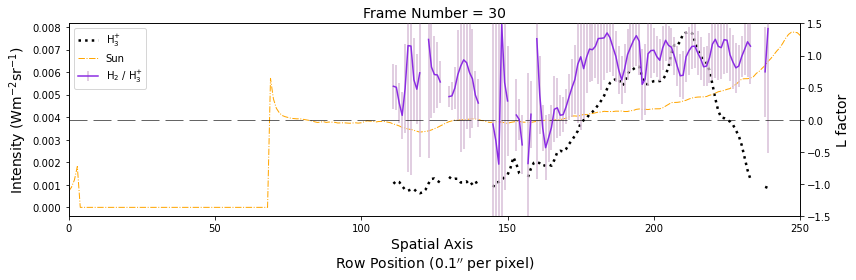

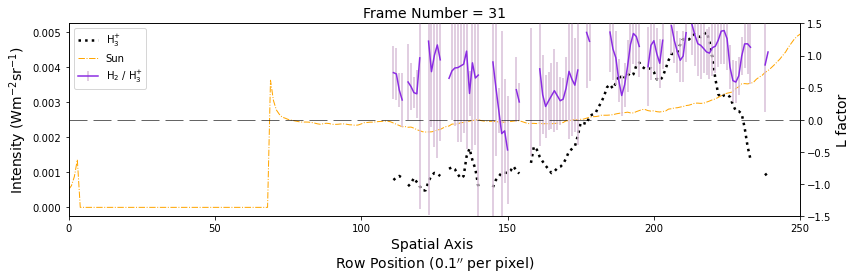

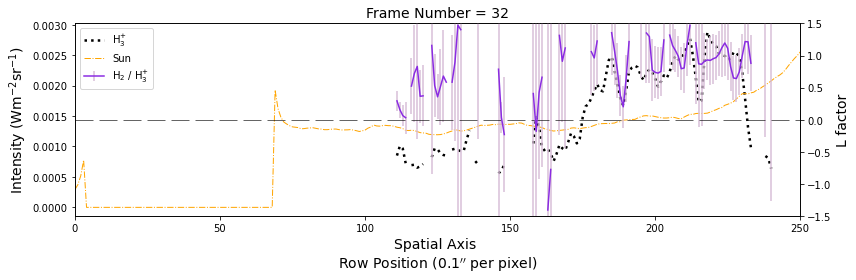

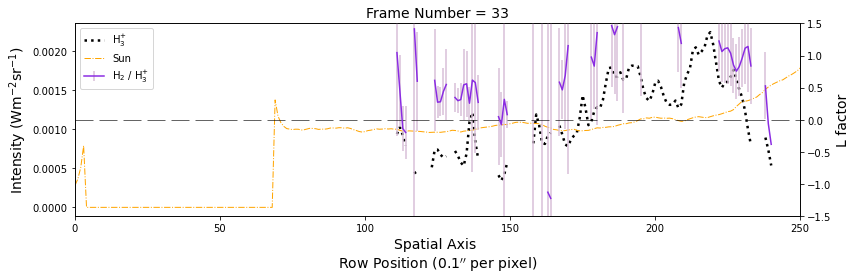

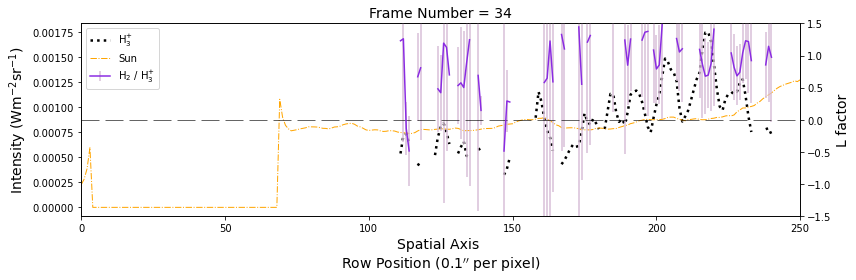

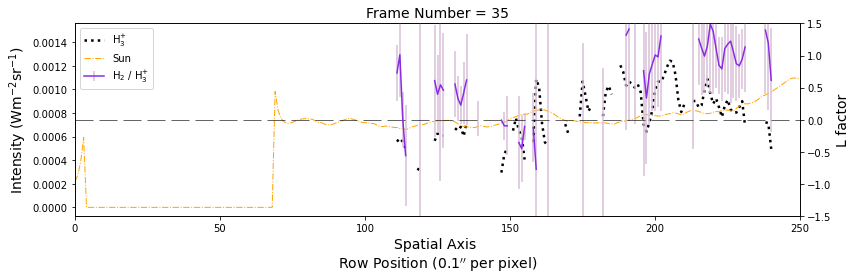

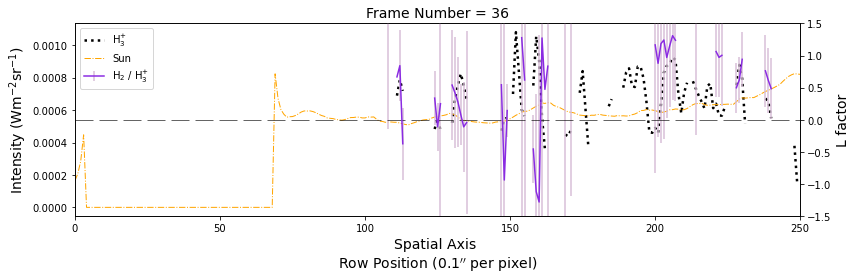

In [8]:
d2 = a2 / b2
d2[d2 > 1.5] = np.nan
d2[d2 < -1.5] = np.nan

errd2 = d2 * np.sqrt((h2_verr / a2)**2 + (h3p_verr / b2)**2)

for i in range(len(h3p_vorf)):
    if i not in (0,15,16,37):  
        xnew = np.linspace(0,299,300)
        int2 = (ref_sun/np.nanmax(ref_sun[i])*np.nanmax(h3p_int[i]))
        
        fig, ax = plt.subplots(figsize = (12, 4))
        plt.title('Frame Number = '+ str(i), fontsize=14)
        
        ax2 = ax.twinx()
        ax.plot(xnew, h3p_int[i], color='k', ls=':', label='H$_3^{+}$', lw=2.5)
        ax.plot(xnew, int2[i], color='orange', ls='-.', label='Sun', lw=1)
#         ax2.errorbar(xnew, a2[i], yerr=h2_verr[i], color='red', ecolor='lightsalmon', label='H$_2$')
#         ax2.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='blue', ecolor='lightblue', label='H$_3^{+}$')
        ax2.errorbar(xnew, d2[i], yerr=errd2[i], color='blueviolet', ecolor='thistle', label='H$_2$ / H$_3^{+}$')
        
        # giving labels to the axises
        ax.set_xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
        ax.set_ylabel('Intensity (Wm$^{-2}$sr$^{-1}$)', fontsize=14)

        # secondary y-axis label
        ax2.set_ylabel('L factor', fontsize=14)
        plt.axhline(y=0, xmin=0, xmax=250, color='black', ls='dashed', dashes=(30, 10), lw=0.6)
        plt.xlim(0,250)
        plt.ylim(-1.5,1.5)
        
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc=0)
        
        plt.tight_layout()
        plt.savefig(imgpath + '/h2_h3p_l_fr_' +str(i), dpi=400, bbox_inches='tight', facecolor='white')